In [2]:
import pandas as pd

file_path = 'oasis_cross-sectional-5708aa0a98d82080.xlsx'
oasis_data = pd.read_excel(file_path)

print("Initial dataset preview:")
display(oasis_data.head())

oasis_data['Label'] = oasis_data['CDR'].apply(lambda x: 1 if x > 0 else 0)

updated_file_path = 'oasis_cross-sectional_labeled.xlsx'
oasis_data.to_excel(updated_file_path, index=False)

print("\nUpdated dataset preview with 'Label' column:")
display(oasis_data.head())

print(f"\nUpdated file saved at: {updated_file_path}")

Initial dataset preview:


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN



Updated dataset preview with 'Label' column:


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Label
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,0
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,0
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,1
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN,0
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN,0



Updated file saved at: oasis_cross-sectional_labeled.xlsx


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Select features and target variable
features = ['Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
X = oasis_data[features].fillna(0)  # Fill NaNs with 0 for simplicity
y = oasis_data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the MLP classifier with adjusted parameters
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=2000, learning_rate_init=0.0005, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predictions and performance on test set
y_pred = mlp.predict(X_test_scaled)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

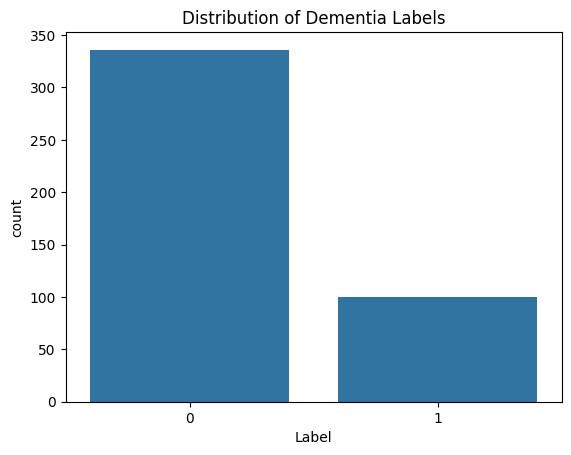

In [5]:
# 1. Target Variable Distribution
sns.countplot(data=oasis_data, x='Label')
plt.title("Distribution of Dementia Labels")
plt.show()

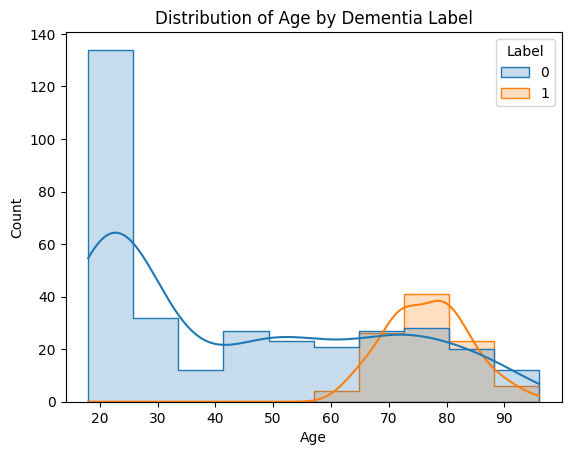

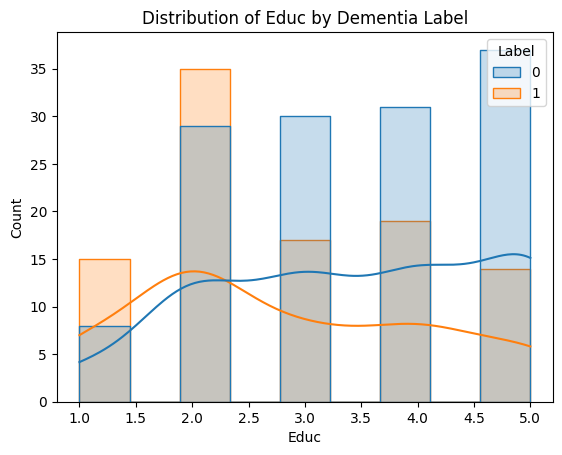

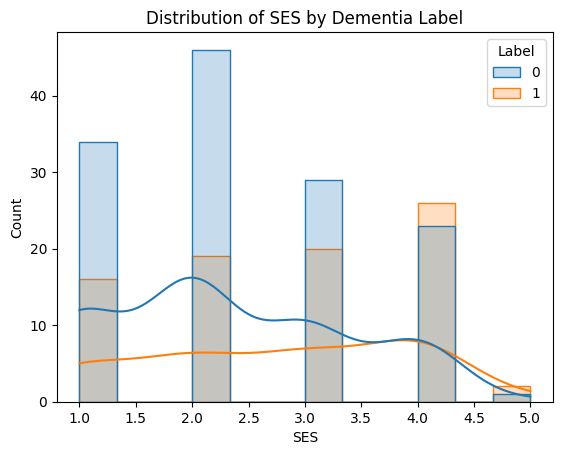

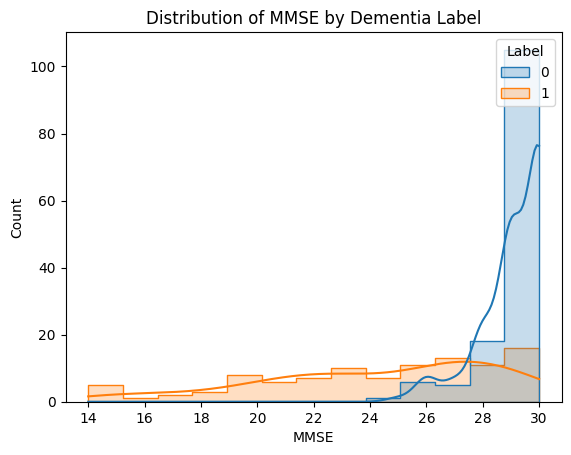

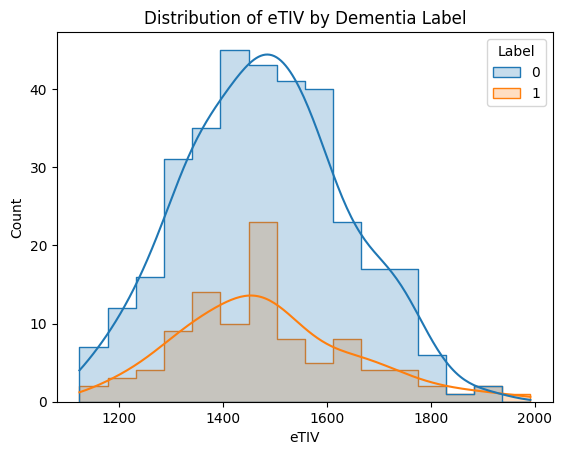

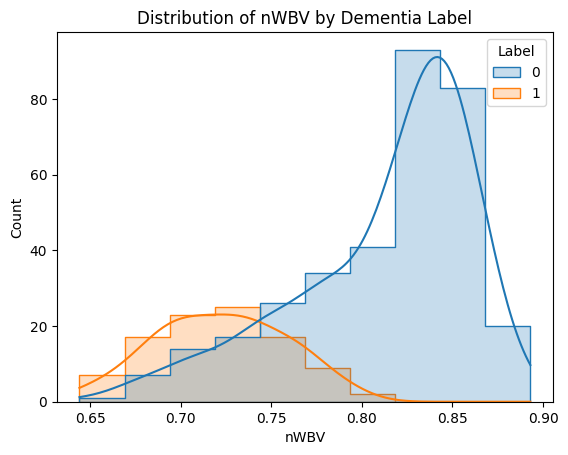

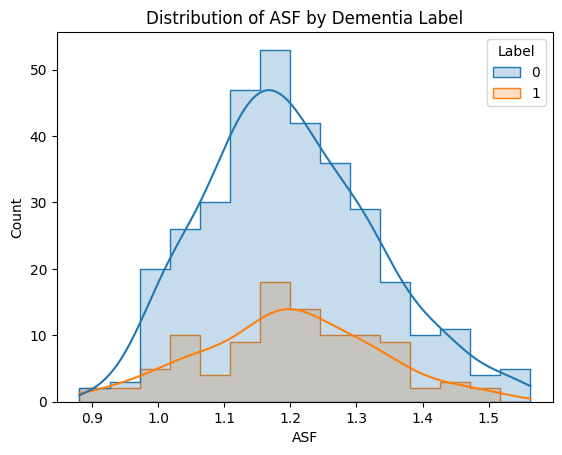

In [6]:
# 2. Feature Distributions
for feature in features:
    plt.figure()
    sns.histplot(data=oasis_data, x=feature, hue='Label', kde=True, element='step')
    plt.title(f"Distribution of {feature} by Dementia Label")
    plt.show()

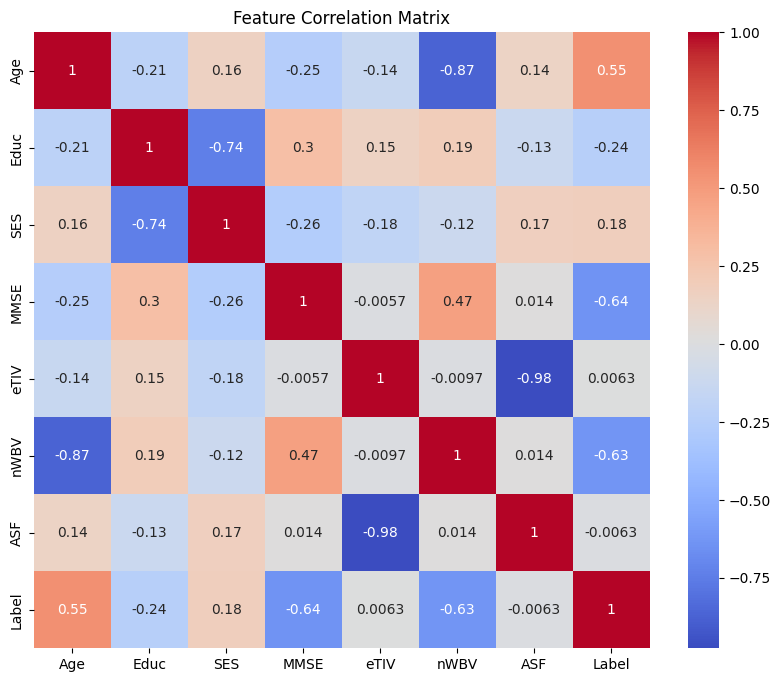

In [7]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(oasis_data[features + ['Label']].corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Feature Correlation Matrix")
plt.show()

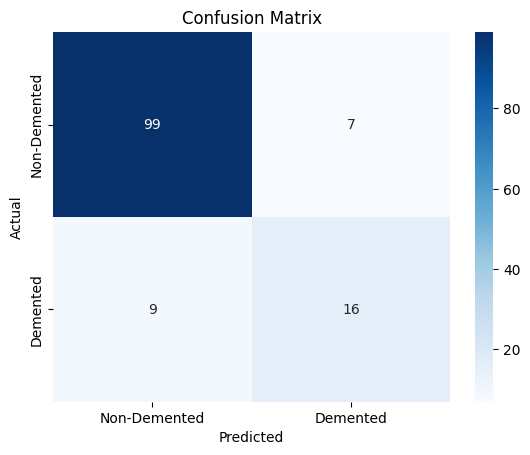

Accuracy: 0.8778625954198473
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       106
           1       0.70      0.64      0.67        25

    accuracy                           0.88       131
   macro avg       0.81      0.79      0.80       131
weighted avg       0.87      0.88      0.88       131



In [8]:
# 4. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Demented', 'Demented'],
            yticklabels=['Non-Demented', 'Demented'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

In [9]:
def predict_new_data(age, educ, ses, mmse, etiv, nwbv, asf):
    new_data = pd.DataFrame([[age, educ, ses, mmse, etiv, nwbv, asf]], columns=features)
    new_data_scaled = scaler.transform(new_data)

    # Predict with the trained model
    prediction = mlp.predict(new_data_scaled)
    probability = mlp.predict_proba(new_data_scaled)[0][1]

    print(f"Predicted Label: {'Demented' if prediction[0] == 1 else 'Non-Demented'}")
    print(f"Probability of Dementia: {probability:.2f}")

# Example
predict_new_data(age=75, educ=4, ses=2, mmse=28, etiv=1500, nwbv=0.7, asf=1.1)

Predicted Label: Demented
Probability of Dementia: 0.96
